In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FINAL_DATASET12.csv to FINAL_DATASET12.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FINAL_DATASET12.csv']))

In [ ]:
df.head(5)

,DB_KEY,PARENT_KEY,causing_effect,Involved_person_ID,per_group,gender,area,ID,CATEGORY,STATUS,...,location,InvestigationStatuLabel,Investiation_Lead_ID,Methodology_Analysis,Incident_Type,injury_classification,injury_illness_type,injury_description,level,Long_Text
0,0022483656641EECB8C01F3E68CE2ED2,0022483656641EECB8C01F3E68CDCED2,Technical Safety Device,A000090000007 ...,Contractor,M,UN-BC/SMS,548,Safety Observation,1,...,REDE DE ÁGUA POTÁVEL,New,,C,Acidente Tipico,Lesão,Injuries to the thorax,Com afastamento - incapacidade temporária ...,1,"The young driver is near tears, the supervisor..."
1,0022483656641EECBB83DF0BD17F6965,0022483656641EECBB83DF0BD17F0965,Technical Safety Device,DBPPH ...,Contractor,M,UN-BC/SMS,620,Incident,2,...,REDE DE DISTRIBUIÇÃO ELÉTRICA NORMAL,New,,C,Accident on Way to / from Work,Lesão,"Injuries to the abdomen, lower back...",Com afastamento - incapacidade temporária ...,1,This is not an extreme case. You see accidents...
2,0022483656641EECBCB0C501A97E8C02,0022483656641EECBCB0C501A97E2C02,Technical Safety Device,A000090000266 ...,Contractor,M,UN-BC/SMS,683,Incident,1,...,"QCM Ar Cond C1,C2,D1,D2",New,,C,Doenca Profissional,Lesão,Injuries to the hip and thigh,Sem afastamento - tratameto médico ...,1,"Typically, accident investigation is the sole ..."
3,0022483656641EECBCB1766374C70FCF,00224836F2101EDCBCB09266C32EA1B2,Technical Safety Device,C0000000113 ...,External Person,M,UN-BC/SMS,671,Incident,2,...,BEBED.CORREDOR ALA:AB,In Process,DB4G5,C,Accident on Way to / from Work,Lesão,Injuries to the ankle and foot,Com afastamento - incapacidade temporária ...,1,Accident investigation begins with controlling...
4,0022483656641EECBCB24D23F370D41A,0022483656641EECBCB24D23F370741A,Technical Safety Device,A000090000249 ...,Contractor,M,UN-BC/SMS,686,Near Miss,1,...,Bebedouro corredor ala C/D,New,,C,Acidente com Comunidade,Lesão,Injuries involving multiple body regions,Com afastamento - incapacidade temporária ...,1,"To structure the initial response, there are ""..."


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data (1).csv


In [ ]:
import io
test_data = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))

In [ ]:
print('There are '+str(df.shape[0])+'rows and '+str(df.shape[1])+' column in the dataset')
print('')
print('')
print('Columns in the dataset:')
for column in df.columns:
    print (column)
    
print('')
print('')
print('Brief information about the dataset:')
print(df.info())

There are 514rows and 30 column in the dataset


Columns in the dataset:
DB_KEY                          
PARENT_KEY                      
causing_effect
Involved_person_ID           
per_group
gender
area
ID 
CATEGORY
STATUS                                 
User_Status
incident
year
month
day
time
hour
minute
second
plant
location
InvestigationStatuLabel
Investiation_Lead_ID
Methodology_Analysis
Incident_Type
injury_classification
injury_illness_type
injury_description
level
Long_Text


Brief information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   DB_KEY                                   514 non-null    object
 1   PARENT_KEY                               514 non-null    object
 2   causing_effect                           514 non-null    object
 3   Involved_person

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
#Drop the columns which are high corelation
df = df.drop(df.columns[[0,1,3,4,5,6,7,8,9,10,12,13,14,16,17,18,21,22,23]],axis = 1)

In [ ]:
data_df = df

In [ ]:
data_df['long_text'] = df['long_text'].astype(str)

In [ ]:
df_new = data_df[0:0]

In [ ]:
df_new = df_new.drop(df.columns[[0,1,2,3,4,5,6,7,8]],axis = 1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      0 non-null      int64 
 1   long_text  0 non-null      object
dtypes: int64(1), object(1)
memory usage: 124.0+ bytes


In [ ]:
df_level = data_df
df_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   causing_effect         514 non-null    object
 1   incident               514 non-null    int64 
 2   time                   514 non-null    int64 
 3   plant                  514 non-null    int64 
 4   location               514 non-null    object
 5   incident_type          514 non-null    object
 6   injury_classification  514 non-null    object
 7   injury_illness_type    514 non-null    object
 8   injury_description     514 non-null    object
 9   level                  514 non-null    int64 
 10  long_text              514 non-null    object
dtypes: int64(4), object(7)
memory usage: 44.3+ KB


In [ ]:
df_level = df_level.drop(df_level.columns[[0,1,2,3,4,5,6,7,8,10]],axis = 1)

In [ ]:
df_level.head(5)

,level
0,1
1,1
2,1
3,1
4,1


In [ ]:
# This will hold all of the dataset samples, as strings.
sen_w_feats = []

# The labels for the samples.
labels = []

# First, reload the dataset to undo the transformations we applied for XGBoost.
#data_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

# Some of the reviews are missing either a "Title" or "Review Text", so we'll 
# replace the NaN values with empty string.
#data_df = data_df.fillna("")


print('Combining features into strings...')

# For each of the samples...
for index, row in data_df.iterrows():

    # Piece it together...    
    combined = ""
    
    #combined += "The ID of this item is {:}, ".format(row["Clothing ID"])
    #combined += "This item comes from the {:} department and {:} division, " \
    #            "and is classified under {:}. ".format(row["Department Name"], 
    #                                                   row["Division Name"], 
    #                                                   row["Class Name"])
    
    combined += row["causing_effect"]
    combined += "Incident occured date is {:}. ".format(row["incident"])
    combined += "Incident occured time is {:}. ".format(row["time"])
    combined += "Incident occured plant is {:}. ".format(row["plant"])
    combined += row["location"]
    combined += row["incident_type"]
    combined += row["injury_classification"]
    combined += row["injury_illness_type"]
    #combined += "I rate this item {:} out of 5 stars. ".format(row["Rating"])
    
    # Not all samples have titles.
    #if not row["Title"] == "":
    #    combined += row["Title"] + ". "
    
    # Finally, append the review the text!
    combined += row["injury_description"]
    combined += row["long_text"]
    

    # Add the combined text to the list.
    sen_w_feats.append(combined)

    # Also record the sample's label.
    labels.append(row["level"])

    combined1 = {'long_text' : combined, 'level': 4}
    df_new = df_new.append(combined1, ignore_index=True)

    df_new.long_text = combined
    df_new.level = (row["level"])
print('  DONE.')

print('Dataset contains {:,} samples.'.format(len(sen_w_feats)))

Combining features into strings...
  DONE.
Dataset contains 514 samples.


In [ ]:
df_new2 = pd.DataFrame(sen_w_feats, columns=['text'])

In [ ]:
df_new2.head(3)

,text
0,Technical Safety DeviceIncident occured date i...
1,Technical Safety DeviceIncident occured date i...
2,Technical Safety DeviceIncident occured date i...


In [ ]:
# Combine the DataFrame-1 & DataFrame-2
# along horizontal axis using concat() function
df_new3 = pd.concat([df_new2, df_level], axis = 1)

In [ ]:
df_new3.head(20)

,text,level
0,Technical Safety DeviceIncident occured date i...,1
1,Technical Safety DeviceIncident occured date i...,1
2,Technical Safety DeviceIncident occured date i...,1
3,Technical Safety DeviceIncident occured date i...,1
4,Technical Safety DeviceIncident occured date i...,1
5,Technical Safety DeviceIncident occured date i...,1
6,Technical Safety DeviceIncident occured date i...,1
7,Technical Safety DeviceIncident occured date i...,1
8,Technical Safety DeviceIncident occured date i...,1
9,Technical Safety DeviceIncident occured date i...,1


In [ ]:
#from google.colab import files
#import pandas as pd
#df_new3.to_csv('example_file.csv')
#files.download('example_file.csv')

In [ ]:
data1 = df_new3

In [ ]:
from sklearn.model_selection import train_test_split

X = data1.text.values
y = data1.level.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.2, random_state=2020)

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 6.71 s, sys: 746 ms, total: 7.45 s
Wall time: 7.47 s


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9202
Accuracy: 92.23%


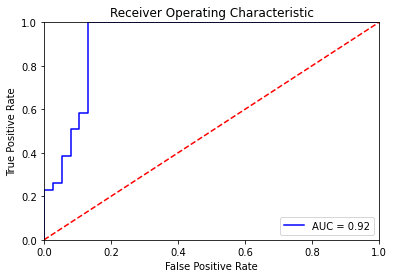

In [ ]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)